In [1]:
import csv
import numpy as np

In [3]:
arr=[]
with open('out.data','r') as fin:
    cin=csv.reader(fin,delimiter=' ')
    for row in cin:
        row=[float(em) for em in row if em != '']
        if row != []:
            arr.append(row)

In [4]:
arr[:5]

[[0.0, -4880.0],
 [2.5e-05, -3905.0],
 [5e-05, -2850.0],
 [7.5e-05, -1795.0],
 [0.0001, -781.0]]

## wait the data stable, so
## take the last Nsample points

In [5]:
result=np.array(arr)
print(result.shape)
NSample=2000
r  =(result.shape[0])-NSample
rr =result.shape[0]

(600000, 2)


In [6]:
yy=result[r:rr, 1] 

In [10]:
print(yy.shape)

(2000,)


In [7]:
yy[:5]

array([  277.,  -224.,  -918., -1752., -2729.])

## want totalN pt FFT,so
## zero padding Nsample to totalN

In [8]:
totalN=80000
yyy=np.pad(yy,(0,totalN-NSample),'constant')

In [9]:
yyy[:5]

array([  277.,  -224.,  -918., -1752., -2729.])

In [18]:
print(type(yyy))
print(yyy.shape)

<class 'numpy.ndarray'>
(80000,)


In [12]:
T=0.000025
#print('nonzero during ',NSample*T)
stop=(totalN-1)*T
t=np.linspace(0,stop,totalN)

In [16]:
print(type(t))
print(t.shape)

<class 'numpy.ndarray'>
(80000,)


In [13]:
import matplotlib.pyplot as plt

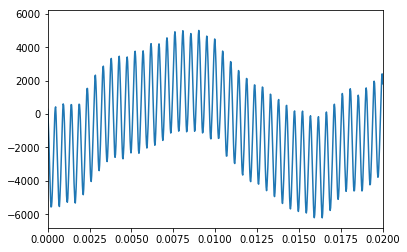

In [23]:
plt.xlim(0,0.02)
plt.plot(t,yyy)

In [31]:
from scipy import fftpack
faX=fftpack.fft(yyy)
Xc=faX*T
Xcabs=np.abs(Xc)
print(type(Xcabs))
print(Xcabs.shape)

<class 'numpy.ndarray'>
(80000,)


72.18403256817516

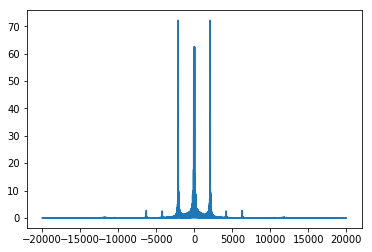

In [32]:
freqs=fftpack.fftfreq(totalN,T)
plt.plot(freqs,Xcabs)
np.max(Xcabs)

In [38]:
peak_result=np.where(Xcabs==np.max(Xcabs))
print(type(peak_result))
print(peak_result)
print(peak_result[0])
peak_index=peak_result[0][0]
print(peak_index)

<class 'tuple'>
(array([ 4200, 75800]),)
[ 4200 75800]
4200


In [29]:
print('The frequency is :' ,freqs[peak_index])

The frequency is : 2100.0
